## UCB performances for point 4 and 5

In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.UCB_Learner import *
from Advertising.learners.UCB_Learner_qualities import *
from experiment_utilities import *

seed = 6789 
arms = arms_creation(seed = 30291, number_of_arms= 20)
random.seed(seed)

exploration=4.2

deltas=[0.5,0.42,0.38,0.30,0.2,0.05]

social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')

with open('Config/estimated_influence.json', 'r') as file:
    data = json.load(file)
    nodes_estimation = data.get('estimated_influence')

with open('Config/clairvoyants.json', 'r') as file:
    clairvoyants = json.load(file)

with open('Config/bids.json', 'r') as file:
    data = json.load(file)
    bids = data.get('bids')

n_rounds=5000

all_bids = bids[0]



### Testing UCB: point 4, only samples in first position

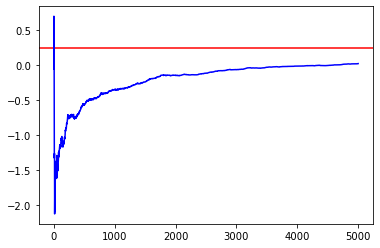

In [2]:


# Running UCB, missing qualities, samples in only first position

learner = UCB_Learner_qualities(arms = arms, hyperpar = exploration, nodes_estimation = nodes_estimation)


moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids, arms = arms,
                            social_network= social_network, first = True, qualities = True)

clairvoyant = clairvoyants.get('clairvoyant_q_f')
# Plotting
plot_clairvoyant(clairvoyant=clairvoyant, moving_average= moving_average)


### Testing UCB: point 4, all samples available

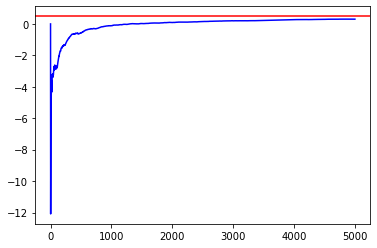

In [3]:


# Running UCB, missing qualities, all samples

learner = UCB_Learner_qualities(arms = arms, hyperpar = exploration, nodes_estimation = nodes_estimation)


moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids, 
                            arms = arms,
                            social_network= social_network,first = False, qualities = True)

clairvoyant = clairvoyants.get('clairvoyant_q_a')
# Plotting
plot_clairvoyant(clairvoyant=clairvoyant, moving_average= moving_average)


### Testing UCB: point 5, only samples in first position

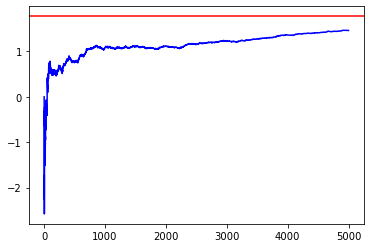

In [4]:

# Running UCB, missing everything, samples only in first position

learner = UCB_Learner(arms = arms, hyperpar = exploration)

moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids,
                            arms = arms,
                            social_network= social_network, first = True, qualities = False)

clairvoyant = clairvoyants.get('clairvoyant_nq_f')
# Plotting
plot_clairvoyant(clairvoyant=clairvoyant, moving_average= moving_average)



### Testing UCB: point 5, all samples available

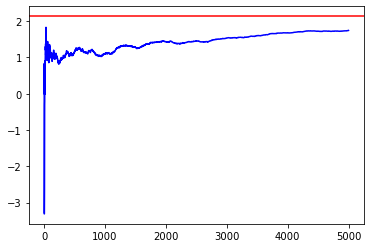

In [5]:


# Running UCB, missing everything, all samples

learner = UCB_Learner(arms = arms, hyperpar = exploration)

moving_average = experiment(rounds = n_rounds, learner = learner, all_bids = all_bids,
                            arms = arms,
                            social_network= social_network, first = False, qualities = False)

clairvoyant = clairvoyants.get('clairvoyant_nq_a')
# Plotting
plot_clairvoyant(clairvoyant=clairvoyant, moving_average= moving_average)
